# Part II Assignment 2

## 1. Consider the cubic approximation $g(x)$ of the function $f(x)$ 
$$
f(x)\approx g(x)=Ax^3 +Bx^2 +Cx+D
$$
which satisfies

$$
\begin{cases}
\begin{aligned}
g(-\frac{3h}2) &= f(-\frac{3h}2)\\
g(-\frac{h}2) &= f(-\frac{h}2)\\
g(\frac{h}2) &= f(\frac{h}2)\\
g(\frac{3h}2) &= f(\frac{3h}2)
\end{aligned}
\end{cases}
$$

### (a) Find $B$ and $D$ in terms of $h$

In [1]:
using SymPy,Plots,Markdown

plotly();

┌ Warning: For saving to png with the `Plotly` backend `PlotlyBase` and `PlotlyKaleido` need to be installed.
│   err =
│    ArgumentError: Package PlotlyKaleido not found in current path.
│    - Run `import Pkg; Pkg.add("PlotlyKaleido")` to install the PlotlyKaleido package.
└ @ Plots ~/.julia/packages/Plots/QZRtR/src/backends.jl:552


In [2]:
@vars h x
@vars A B C D

(A, B, C, D)

In [3]:
f = SymFunction("f")

f

In [4]:
g(x) = A*x^3+B*x^2+C*x+D

g (generic function with 1 method)

In [5]:
solution = linsolve([g(x)-f(x) for x ∈ (-3*h/2,-h/2,h/2,3*h/2)],(A,B,C,D))

⎧⎛   ⎛-3⋅h ⎞    ⎛-h ⎞    ⎛h⎞    ⎛3⋅h⎞   ⎛-3⋅h ⎞    ⎛-h ⎞    ⎛h⎞    ⎛3⋅h⎞   ⎛-3
⎪⎜  f⎜─────⎟   f⎜───⎟   f⎜─⎟   f⎜───⎟  f⎜─────⎟   f⎜───⎟   f⎜─⎟   f⎜───⎟  f⎜──
⎪⎜   ⎝  2  ⎠    ⎝ 2 ⎠    ⎝2⎠    ⎝ 2 ⎠   ⎝  2  ⎠    ⎝ 2 ⎠    ⎝2⎠    ⎝ 2 ⎠   ⎝  
⎨⎜- ──────── + ────── - ──── + ──────, ──────── - ────── - ──── + ──────, ────
⎪⎜       3         3       3       3        2         2       2       2     24
⎪⎝    6⋅h       2⋅h     2⋅h     6⋅h      4⋅h       4⋅h     4⋅h     4⋅h        
⎩                                                                             

⋅h ⎞      ⎛-h ⎞      ⎛h⎞    ⎛3⋅h⎞     ⎛-3⋅h ⎞      ⎛-h ⎞      ⎛h⎞    ⎛3⋅h⎞⎞⎫
───⎟   9⋅f⎜───⎟   9⋅f⎜─⎟   f⎜───⎟    f⎜─────⎟   9⋅f⎜───⎟   9⋅f⎜─⎟   f⎜───⎟⎟⎪
2  ⎠      ⎝ 2 ⎠      ⎝2⎠    ⎝ 2 ⎠     ⎝  2  ⎠      ⎝ 2 ⎠      ⎝2⎠    ⎝ 2 ⎠⎟⎪
──── - ──────── + ────── - ──────, - ──────── + ──────── + ────── - ──────⎟⎬
⋅h       8⋅h       8⋅h      24⋅h        16         16        16       16  ⎟⎪
                                                             

In [6]:
B_solution = solution.__pyobject__.args[1].args[2]
Eq(B,B_solution)

     ⎛-3⋅h ⎞    ⎛-h ⎞    ⎛h⎞    ⎛3⋅h⎞
    f⎜─────⎟   f⎜───⎟   f⎜─⎟   f⎜───⎟
     ⎝  2  ⎠    ⎝ 2 ⎠    ⎝2⎠    ⎝ 2 ⎠
B = ──────── - ────── - ──── + ──────
         2         2       2       2 
      4⋅h       4⋅h     4⋅h     4⋅h  

In [7]:
D_solution = solution.__pyobject__.args[1].args[4]
Eq(D,D_solution)

       ⎛-3⋅h ⎞      ⎛-h ⎞      ⎛h⎞    ⎛3⋅h⎞
      f⎜─────⎟   9⋅f⎜───⎟   9⋅f⎜─⎟   f⎜───⎟
       ⎝  2  ⎠      ⎝ 2 ⎠      ⎝2⎠    ⎝ 2 ⎠
D = - ──────── + ──────── + ────── - ──────
         16         16        16       16  

### (b) Obtain the formula of the approximation of
$$
\int_{-\frac{3h}2}^{\frac{3h}2}f(x)dx\approx\int_{-\frac{3h}2}^{\frac{3h}2}(Ax^3 +Bx^2 +Cx+D)dx
$$
in terms of $h,f(-\frac{3h}2),f(-\frac{h}2),f(\frac{h}2),f(\frac{3h}2)$.

First of all, let utilize the odevity of $g(x)$ to do basic simplification.

$$
\begin{aligned}
\int_{-\frac{3h}2}^{\frac{3h}2}(Ax^3 +Bx^2 +Cx+D)dx
&=\int_{-\frac{3h}2}^{\frac{3h}2}(Bx^2+D)dx\\
\end{aligned}
$$

In [8]:
Eq(integrate(f(x),(x,-3*h/2,3*h/2)),integrate(B*x^2+D,(x,-3*h/2,3*h/2))(B=>B_solution,D=>D_solution)|>simplify)

 3⋅h                                                       
 ───                ⎛ ⎛-3⋅h ⎞      ⎛-h ⎞      ⎛h⎞    ⎛3⋅h⎞⎞
  2             3⋅h⋅⎜f⎜─────⎟ + 3⋅f⎜───⎟ + 3⋅f⎜─⎟ + f⎜───⎟⎟
  ⌠                 ⎝ ⎝  2  ⎠      ⎝ 2 ⎠      ⎝2⎠    ⎝ 2 ⎠⎠
  ⎮   f(x) dx = ───────────────────────────────────────────
  ⌡                                  8                     
-3⋅h                                                       
─────                                                      
  2                                                        

### (c) Obtain the composite rule for

$$
\int_a^bf(x)dx
$$

in terms of $h$ and $f(x_k)$, where $x_k = a + kh$, $k = 0, 1, 2,\cdots , N$, and $h = b-a$ with $N$ being a multiple of 3.

$$
\int_a^bf(x)dx=\frac{3h}8\sum_{i=1}^{\frac{N}3}\left[f(x_{3i-3})+3f(x_{3i-2})+3f(x_{3i-1})+f(x_{3i})\right]
$$


## 2. Write a program to calculate an approximate value for the integral
$$
\int_0^2(x^4-2x+1)dx
$$

### (a) using 
- (i) Trapezoidal rule
$$
I = h\left[\frac12f(a)+\frac12f(b)+\sum_{k=1}^{N-1}f(a+kh)\right]
$$

- (ii) Simpson’s 1/3 rule

$$
I = \frac13 h\left[f(a)+f(b)+4\sum_{k=1}^{\frac{N}2}f(a+(2k-1)h)+2\sum_{k=1}^{\frac{N}2-1}f(a+2kh)\right]
$$
 

with 10 slices.

In [9]:
function trapezoidal(f::Function,a::Real,b::Real;N::Int=10,fᵃ::Union{Real,Nothing}=nothing,fᵇ::Union{Real,Nothing}=nothing)
    h = (b-a)/N
    k = 1:(N-1)
    fᵃ isa Nothing && (fᵃ = f(a))
    fᵇ isa Nothing && (fᵇ = f(b))
    return h*((fᵃ+fᵇ)/2+sum(@.(f(a+k*h))))
end

function simpson(f::Function,a::Real,b::Real;N::Int=10,fᵃ::Union{Real,Nothing}=nothing,fᵇ::Union{Real,Nothing}=nothing)
    h = (b-a)/N
    k₁ = 1:(Int(N/2))
    k₂ = 1:(Int(N/2-1))
    fᵃ isa Nothing && (fᵃ = f(a))
    fᵇ isa Nothing && (fᵇ = f(b))
    return 1/3*h*(fᵃ+fᵇ+4*sum(@.(f(a+(2k₁-1)*h)))+2*sum(@.(f(a+2k₂*h))))
end

simpson (generic function with 1 method)

### (b) Run each of the programs in (a) and compare your result to the exact value. What is the fractional error on the calculation?

In [10]:
F(x) = x^4+2x+1
# the exact value
Iᴿ=integrate(F(x),(x,0,2)) |> N |> float

12.4

In [11]:
Iᵀ=trapezoidal(F,0,2;N=10)
display(md"""
    **Using Trapezoidal rule**:
    
    The numerical result is $Iᵀ.
    
    The fractional error is $((Iᵀ-Iᴿ)/Iᴿ).
    """)

**Using Trapezoidal rule**:

The numerical result is 12.50656.

The fractional error is 0.008593548387096773.


In [12]:
Iˢ=simpson(F,0,2;N=10)
display(md"""
    **Using Simpson rule**:
    
    The numerical result is $Iˢ.
    
    The fractional error is $((Iˢ-Iᴿ)/Iᴿ).
    """)

**Using Simpson rule**:

The numerical result is 12.400426666666666.

The fractional error is 3.440860215047654e-5.


### (c) Modify both programs in (a) to use 100 slices instead. Note the improvement in the results. How do the results using Simpson’s 1/3 rule compare with those using trapezoidal rule with the same number (i.e. 10 and 100) of slices?

In [13]:
Iᵀ=trapezoidal(F,0,2;N=100)
display(md"""
    **Using Trapezoidal rule**:
    
    The numerical result is $Iᵀ.
    
    The fractional error is $((Iᵀ-Iᴿ)/Iᴿ).
    """)

**Using Trapezoidal rule**:

The numerical result is 12.401066656000001.

The fractional error is 8.602064516135292e-5.


In [14]:
Iˢ=simpson(F,0,2;N=100)
display(md"""
    **Using Simpson rule**:
    
    The numerical result is $Iˢ.
    
    The fractional error is $((Iˢ-Iᴿ)/Iᴿ).
    """)

**Using Simpson rule**:

The numerical result is 12.400000042666667.

The fractional error is 3.4408602132426464e-9.


**Comparison on result**:
The comparison of result from two method is obvious that the `simpson` method is **more accurate** that the `trapezoidal` method.

## 3.The Planck theory of thermal radiation 

tells us that in the (angular) frequency interval ω to ω + dω, a black body of unit area radiates electromagnetically an amount of thermal energy per second equal to I(ω) dω, where

$$
I(\omega)=\frac{h}{8\pi^3c^2}\frac{\omega^3}{e^{h\omega/2\pi k_BT}-1}
$$

Here h is the Planck’s constant, c is the speed of light, and kB is Boltzmann’s constant. In other words, the total power per unit area radiated by a black body is

$$
W=\int_0^{\infty}I(\omega)d\omega=\int_0^{\infty}\frac{h}{8\pi^3c^2}\frac{\omega^3}{e^{h\omega/2\pi k_BT}-1}d\omega
$$

### (a) By performing a change of variable in the integral, show that

$$
W=\sigma T^4
$$

where $\sigma$ is given by 

$$
\sigma=\frac{2\pi k_B^4}{c^2h^3}\int_0^{\infty}\frac{x^3}{e^x-1}
$$

**Show:**

Let $x=\frac{h\omega}{2\pi k_B T}$, then $\omega=\frac{2\pi k_B T}{h} x$.

$$
\begin{aligned}
W
&=\int_0^{\infty}\frac{h}{8\pi^3c^2}\frac{\omega^3}{e^{h\omega/2\pi k_BT}-1}d\omega\\
&=\int_0^{\infty}\frac{h}{8\pi^3c^2}(\frac{2\pi k_B T}{h})^4 \frac{x^3}{e^x-1}dx\\
&=\frac{2\pi k_B^4 T^4}{c^2h^3}\int_0^{\infty}\frac{x^3}{e^x-1}dx\\
&=\sigma T^4
\end{aligned}
$$



### (b) To evaluate the improper integral, perform a change of variable

$$
z=\frac{x}{1+x}
$$

so that the integral reads

$$
I=\int_0^{\infty}\frac{x^3}{e^x-1}dx=\int_0^1f(z)dz
$$

Find $f(z)$.

**Solution:**

First, solve the equation for $x$ in term of $z$,

$$
\begin{aligned}
z&=1-\frac{1}{1+x}\\
x&=\frac{z}{1-z}\\
\end{aligned}
$$

Then substitute $x$ in the integral,

$$
I=\int_0^1\frac{(\frac{z}{1-z})^3}{e^{(\frac{z}{1-z})^3}-1}d(\frac{z}{1-z})
$$

In [15]:
@vars x z

(x, z)

In [16]:
fexpr=(x^3/(exp(x)-1))(x=>z/(1-z))*simplify(diff(z/(1-z),z))
fexpr

               3              
              z               
──────────────────────────────
                  ⎛   z      ⎞
                  ⎜ ─────    ⎟
       3        2 ⎜ 1 - z    ⎟
(1 - z) ⋅(z - 1) ⋅⎝ℯ      - 1⎠

Then 

$$
f(z)=\frac{z^3}{(1-z)^5(e^{\frac{z}{1-z}}-1)}
$$

### (c) If your result in (b) is correct, 
you will notice that 𝑓(0) and 𝑓(1) are both
of the indeterminate form 0/0. Write a code to plot 𝑓(𝑧) from 𝑧 = 0.01 to
𝑧 = 0.99. 

Guess the value of $lim_{z\to0^+} f(z)$ and $lim_{z\to1^-} f(z)$.

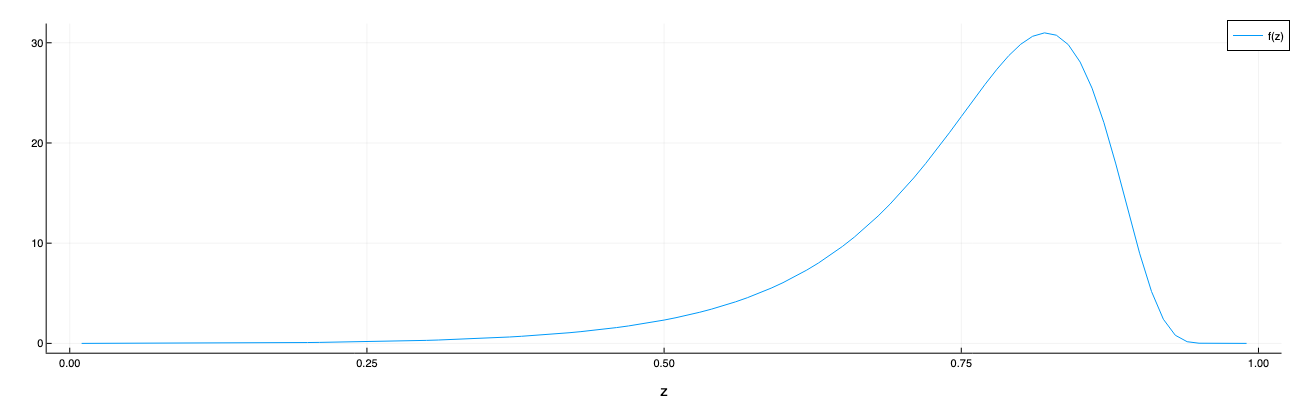

In [17]:
zs = 0.01:0.01:0.99
fs = (t->fexpr(z=>t)).(zs)

plot(zs,fs,label="f(z)")
xlabel!("z")

### (d) Verify your guess in (c) by using SymPy.

In [18]:
limit(fexpr,z=>0,"+")

0

In [19]:
limit(fexpr,z=>1,"-")

0

### (e) Write a code to evaluate the integral I accurate to five significant figures using
- (i) Trapezoidal rule
- (ii) Simpson’s rule
- (iii) Romberg integration
- (iv) Gaussian quadrature

In [25]:
import FastGaussQuadrature:gausslegendre

In [40]:
function gaussian(f::Function,a::Real,b::Real;N::Int=10)
    x,w = gausslegendre(N)
    x = @. ((b-a)*x + (b+a))/2
    w = @. w*(b-a)/2
    return sum(@.(w*f(x)))
end

function romberg(f::Function,a::Real,b::Real;n::Int=10,fᵃ::Union{Real,Nothing}=nothing,fᵇ::Union{Real,Nothing}=nothing)
    fᵃ isa Nothing && (fᵃ = f(a))
    fᵇ isa Nothing && (fᵇ = f(b))
    h = (b-a)/2
    R = zeros(2,n+1)
    R[1,1] = h*(fᵃ+fᵇ)
    for i ∈ 1:n
        R[2,1] = R[1,1]/2 + h*sum(f(a+(2k-1)*h) for k ∈ 1:(2^(i-1)))
        for j ∈ 1:i
            R[2,j+1] = (4^j*R[2,j]-R[1,j])/(4^j-1)
        end
        R[1,:] = R[2, :]
        R[2,:] .= 0
        h /= 2
    end
    return R[1,end]
end

romberg (generic function with 1 method)

In [51]:
trapezoidal(t->fexpr(z=>t)|>N,0,1;N=100,fᵃ=0,fᵇ=0)

6.493939402637864

In [52]:
simpson(t->fexpr(z=>t)|>N,0,1;N=100,fᵃ=0,fᵇ=0)

6.493940347695172

In [53]:
romberg(t->fexpr(z=>t)|>N,0,1;n=10,fᵃ=0,fᵇ=0)

6.493939402267098

In [54]:
gaussian(t->fexpr(z=>t)|>N,0,1;N=100)

6.493939402266829

## Reference

[1] Wiki: Romberg's method, https://en.wikipedia.org/wiki/Romberg%27s_method

[2] Github: FastGaussQuadrature.jl, https://github.com/JuliaApproximation/FastGaussQuadrature.jl.

In [55]:
σ(I;c=299792458,h=6.62607015e-34,k_B=1.380649e-23) = (2π*k_B^4)/(c^2*h^3)*I

σ (generic function with 1 method)

In [56]:
σ(6.493939402266829;c=299792458,h=6.62607015e-34,k_B=1.380649e-23)

5.6703744191844314e-8